In [77]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
results = Table.read_table('results_trimmed.csv')
results

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0


<h2>Creating an Expert Accuracy Rating</h2>

It will be necessary to have a number for expert accuracy in the cases where there was a majority vote, to compare against crowd accuracy.

As for crowd accuracy for these cases, it appears that we already have those numbers! Defined in the column explanations readme file: 
 
"Agreement: Qualified Reads with the Majority Label divided by total Qualified Reads."

In [14]:
expert_yes_votes = results.column(1)
expert_yes_votes

array([ 2.,  0.,  0., ...,  4.,  5.,  5.])

In [41]:
def calc_expert_accuracy(num):
    '''Calculate accuracy rating, from the number of Yes votes, based on a majority vote out of 8. 
    The case where (num < 4) means the majority vote was No.'''
    if num > 4:
        return num/8
    elif num < 4:
        return (8-num)/8
    elif num == 4:
        return None

In [42]:
arr1 = np.arange(0,9)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [43]:
[calc_expert_accuracy(value) for value in arr1]

[1.0, 0.875, 0.75, 0.625, None, 0.625, 0.75, 0.875, 1.0]

In [44]:
len(expert_yes_votes)

27000

In [48]:
expert_accuracy = [calc_expert_accuracy(value) for value in expert_yes_votes]
print(len(expert_accuracy))
set(expert_accuracy)

27000


{0.625, 0.75, 0.875, 1.0, None}

In [50]:
results_with_accuracy = results.with_column('Expert Accuracy', expert_accuracy)
results_with_accuracy

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32,None
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1


<h3>Data Cleaning</h3>

Before we can compare the expert accuracy score with the crowd agreement, some more issues need to be cleaned up in the data. First, we need just the rows where the correct label is defined.

In [52]:
correct_label_exists = results_with_accuracy.where('Correct Label', are.not_equal_to('nan'))
correct_label_exists

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1


And then, we will discover that there are some cases that have no crowd vote recorded. So we'll need to get rid of those too.

In [54]:
set(correct_label_exists.column('Agreement'))

{0.5,
 0.54500000000000004,
 0.66700000000000004,
 0.75,
 0.80000000000000004,
 0.83299999999999996,
 0.85699999999999998,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.875,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.90900000000000003,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.71399999999999997,
 0.77800000000000002,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.58299999999999996,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.57099999999999995,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.625,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.55600000000000005,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.59999999999999998,
 0.63600000000000001,
 0.72699999999999998,
 0.76900000000000002,
 0.81799999999999995,
 0.8459

In [53]:
experts_vs_crowd = correct_label_exists.column('Expert Accuracy') - correct_label_exists.column('Agreement')
experts_vs_crowd

array([-0.25, 0.0, 0.0, ..., -0.042000000000000037, nan,
       -0.17500000000000004], dtype=object)

In [57]:
correct_label_exists.show(100)

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1


Only taking cases where qualified reads are a positive number:

In [59]:
correct_label_and_qualified_reads = correct_label_exists.where('Qualified Reads', are.above(0))
correct_label_and_qualified_reads

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1


In [60]:
set(correct_label_and_qualified_reads.column('Agreement'))

{0.5,
 0.54500000000000004,
 0.55600000000000005,
 0.57099999999999995,
 0.58299999999999996,
 0.59999999999999998,
 0.625,
 0.63600000000000001,
 0.64300000000000002,
 0.66700000000000004,
 0.69199999999999995,
 0.69999999999999996,
 0.71399999999999997,
 0.72699999999999998,
 0.75,
 0.76900000000000002,
 0.77800000000000002,
 0.80000000000000004,
 0.81799999999999995,
 0.83299999999999996,
 0.84599999999999997,
 0.85699999999999998,
 0.875,
 0.88900000000000001,
 0.90000000000000002,
 0.90900000000000003,
 0.91700000000000004,
 0.92300000000000004,
 0.92900000000000005,
 0.93799999999999994,
 1.0}

<h2>Calculating a Comparison Score for Expert Accuracy vs Crowd Accuracy

The comparison score will be calculated by subtracting crowd agreement rate from expert accuracy rate.

In [102]:
comparison = correct_label_and_qualified_reads.column('Expert Accuracy') - correct_label_and_qualified_reads.column('Agreement')
comparison

array([-0.25, 0.0, 0.0, ..., -0.25, -0.042000000000000037,
       -0.17500000000000004], dtype=object)

In [103]:
len(comparison)

23758

In [106]:
results_with_comparison = correct_label_and_qualified_reads.with_column('Comparison', comparison)
results_with_comparison

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight,Expert Accuracy,Comparison
5888087,2,2,no,no,0,1,no,2,1.54,yes,0,0,0.75,-0.25
5888088,0,3,no,no,0,1,no,3,2.34,yes,0,0,1,0
5888089,0,2,no,no,0,1,no,2,1.7,yes,0,0,1,0
5888090,0,1,no,no,0,1,no,1,0.82,yes,0,0,1,0
5888092,0,4,no,no,0,1,no,4,3.3,yes,0,0,1,0
5888093,0,6,no,no,0,1,no,6,4.94,yes,0,0,1,0
5888094,0,2,no,no,0,1,no,2,1.56,yes,0,0,1,0
5888095,0,4,no,no,0,1,no,4,3.34,yes,0,0,1,0
5888096,0,3,no,no,0,1,no,3,2.56,yes,0,0,1,0
5888097,0,4,no,no,0,1,no,4,3.16,yes,0,0,1,0


In [97]:
comparison_tbl = results_with_comparison.select('Expert Accuracy', 'Agreement', 'Comparison')
comparison_tbl

Expert Accuracy,Agreement,Comparison
0.75,1,-0.25
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0


In [133]:
t1 = comparison_tbl.where('Comparison', 0)

In [134]:
set(t1.column('Agreement'))

{0.625, 0.75, 0.875, 1.0}

In [135]:
set(t1.column('Expert Accuracy'))

{0.625, 0.75, 0.875, 1.0}

<h2>Analysis</h2>

Interpretation of the comparison number:

0 means the expert accuracy and the crowd accuracy were the same.

Positive numbers mean expert accuracy rate was higher than crowd.

Negative numbers mean crowd accuracy rate was higher than experts.

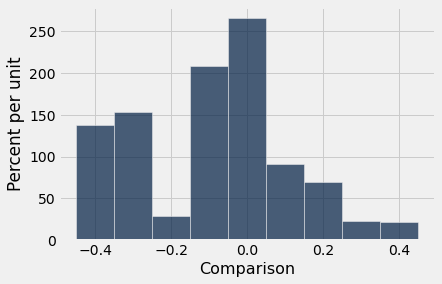

In [98]:
comparison_tbl.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [136]:
same_accuracy_rate = (len(comparison) - np.count_nonzero(comparison)) / len(comparison)
same_accuracy_rate

0.20847714454078625

In [137]:
experts_higher_rate = np.count_nonzero(comparison > 0) / len(comparison)
experts_higher_rate

0.2392878188399697

In [138]:
crowd_higher_rate = np.count_nonzero(comparison < 0) / len(comparison)
crowd_higher_rate

0.552235036619244

In [139]:
same_accuracy_rate + experts_higher_rate + crowd_higher_rate

1.0

Numbers of interest that arise out of this comparison:
    
<strong>Equal accuracy rate:</strong> 20.8% of the time both the crowd and the experts had the same accuracy rate.

<strong>Expert accuracy rate higher:</strong> 23.9% of cases have the expert accuracy rate higher than the crowd's.

<strong>Crowd accuracy rate higher:</strong> 55.2% of cases have the crowd with the higher accuracy rate over the experts.

In these numbers overall, the crowd accuracy rate is <i>at least as good as</i> the expert accuracy rate 76.1% of the time.

<h2>Comparing Cases In More Detail</h2>

<h3>Expert Vote Unanimous</h3>

How does the comparison look specifically on cases where the experts were unanimous?

In [99]:
experts_unanimous = comparison_tbl.where('Expert Accuracy', 1)
experts_unanimous

Expert Accuracy,Agreement,Comparison
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0
1,1,0


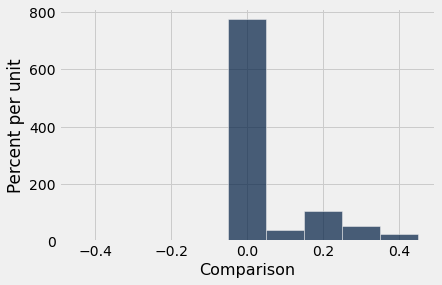

In [100]:
experts_unanimous.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [101]:
experts_unanimous.num_rows

5949

In [94]:
np.count_nonzero(experts_unanimous.column('Comparison'))

1474

In [95]:
1474/5949

0.24777273491343083

In cases where the experts were unanimous with their labeling, the crowd chose the wrong label 25% of the time, or equivalently, the crowd chose the right label 75% of the time.

<h3>Slim Majority in Expert Votes</h3>

What about more difficult cases where the experts were as close as possible to a tie? In terms of our expert accuracy rate, this kind of case has the value 5/8.

In [108]:
experts_5_votes = comparison_tbl.where('Expert Accuracy', 5/8)
experts_5_votes

Expert Accuracy,Agreement,Comparison
0.625,1,-0.375
0.625,0.857,-0.232
0.625,0.75,-0.125
0.625,1,-0.375
0.625,0.857,-0.232
0.625,0.6,0.025
0.625,1,-0.375
0.625,1,-0.375
0.625,1,-0.375
0.625,0.8,-0.175


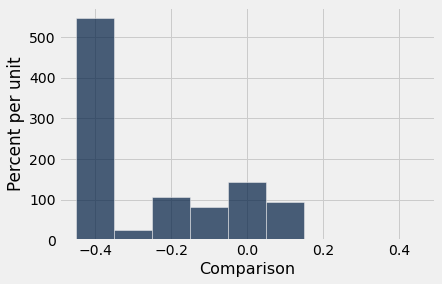

In [115]:
experts_5_votes.hist('Comparison', bins=np.arange(-0.45, 0.46, 0.1))

In [110]:
experts_5_votes.num_rows

5934

In [112]:
np.count_nonzero(experts_5_votes.column('Comparison') < 0)

5085

In [113]:
5085/5934

0.8569261880687563

In cases where the expert vote had only the slim 5/8 majority, the crowd chose the correct label 85.7% of the time!

<h2>Expert Vote Tied, Correct Label Undefined</h2>

By the way we've defined a correct label, we simply don't have one in the difficult cases where the expert vote came out tied. But it's still interesting to consider the question of how the crowd votes tended to turn out in these cases. Were they also split? Or, was there often a notably higher amount of agreement among the crowd votes?

In [142]:
no_correct_label = results.where('Expert Yes Votes', 4)
no_correct_label

Case ID,Expert Yes Votes,Qualified Reads,Correct Label,Majority Label,Difficulty,Agreement,First Choice Answer,First Choice Votes,First Choice Weight,Second Choice Answer,Second Choice Votes,Second Choice Weight
5888091,4,7,nan,yes,nan,0.571,yes,4,3.28,no,3,2.32
5888782,4,5,nan,no,nan,1,no,5,3.94,yes,0,0
5891822,4,5,nan,yes,nan,0.8,yes,4,3.1,no,1,0.76
5891960,4,7,nan,no,nan,1,no,7,5.53,yes,0,0
5891979,4,8,nan,no,nan,0.625,no,5,3.92,yes,3,2.38
5892075,4,8,nan,yes,nan,0.625,yes,5,3.88,no,3,2.32
5892087,4,2,nan,yes,nan,0.5,yes,1,0.84,no,1,0.88
5892132,4,11,nan,yes,nan,0.545,yes,6,4.7,no,5,3.84
5892139,4,10,nan,yes,nan,0.7,yes,7,5.64,no,3,2.38
5892162,4,8,nan,yes,nan,1,yes,8,6.46,no,0,0


In [144]:
set(no_correct_label.column('Qualified Reads'))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18}